2023-12-29 16:52:14,173 - scripts.base_logger - INFO - Significant differences between feature sets in: 6
2023-12-29 16:52:14,173 - scripts.base_logger - INFO - Significant differences between feature sets in: 6
2023-12-29 16:52:14,173 - scripts.base_logger - INFO - Significant differences between feature sets in: 6
2023-12-29 16:52:14,173 - scripts.base_logger - INFO - Significant differences between feature sets in: 6


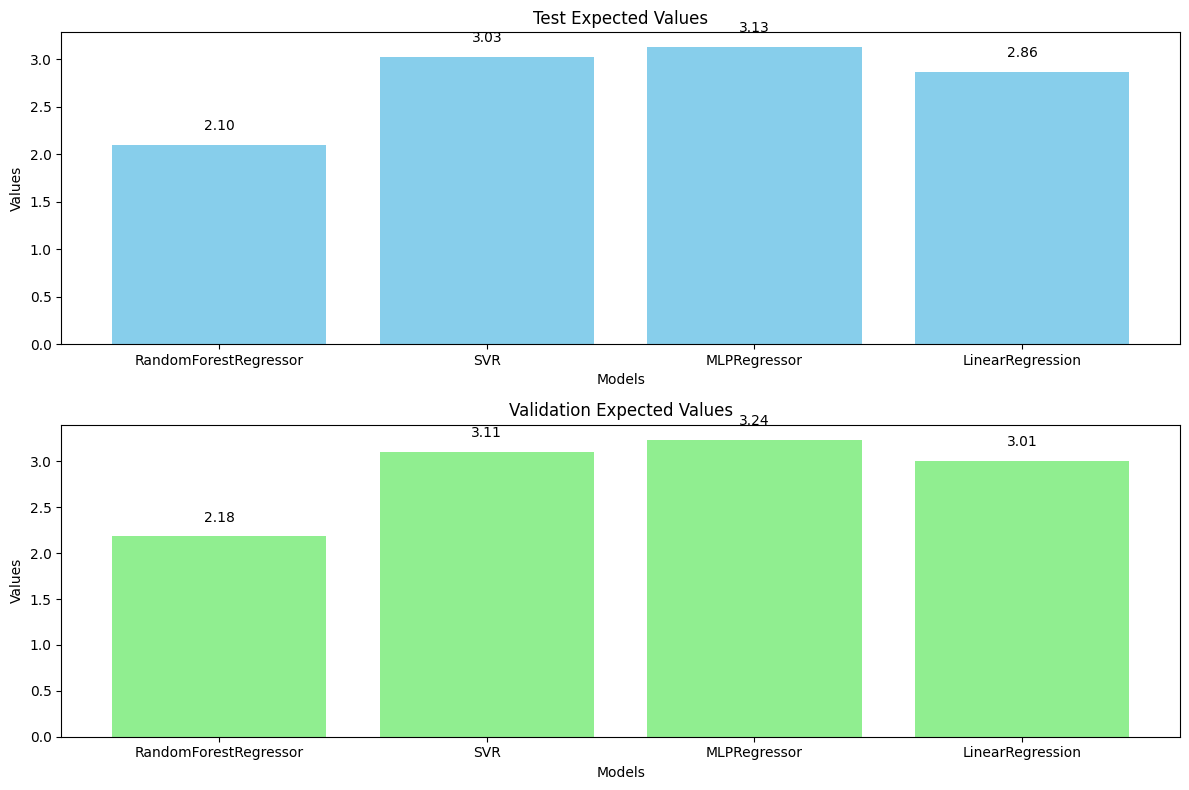

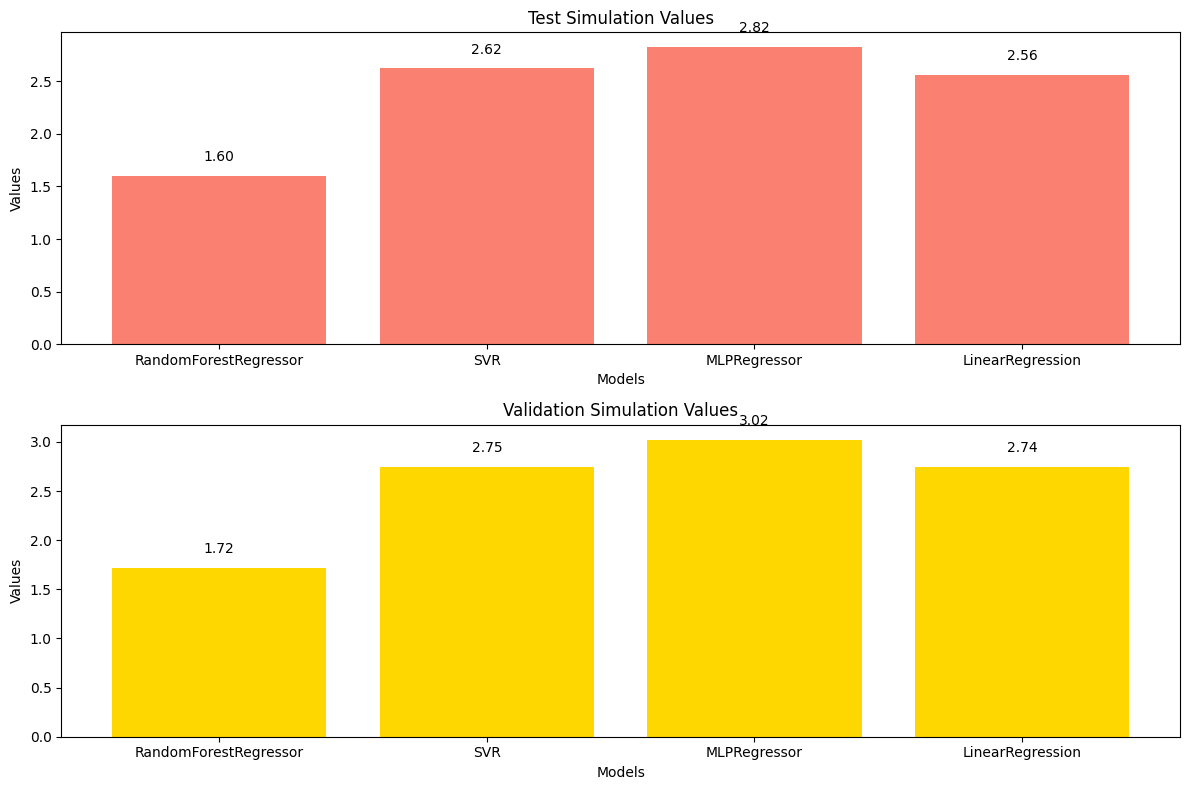

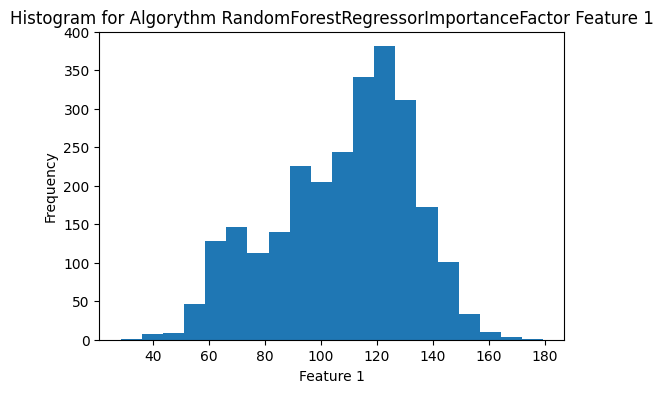

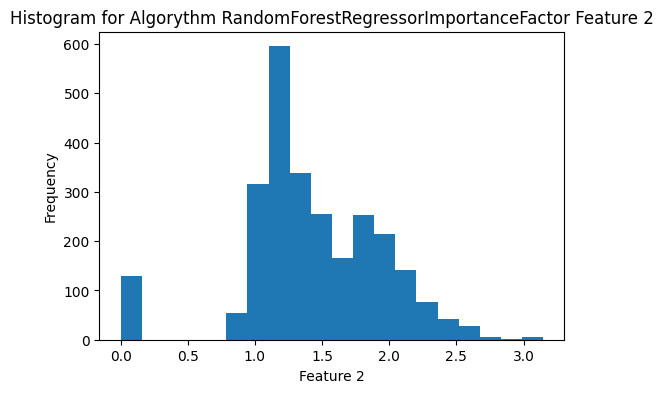

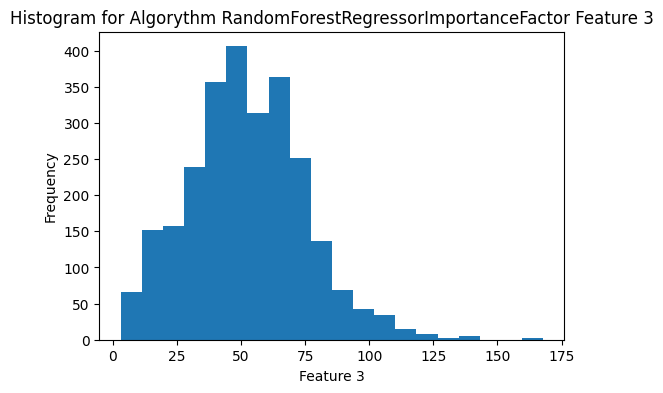

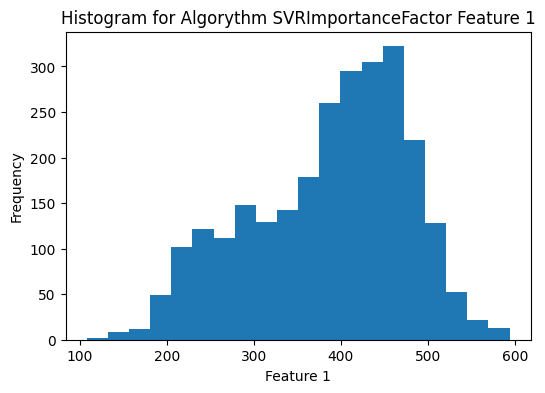

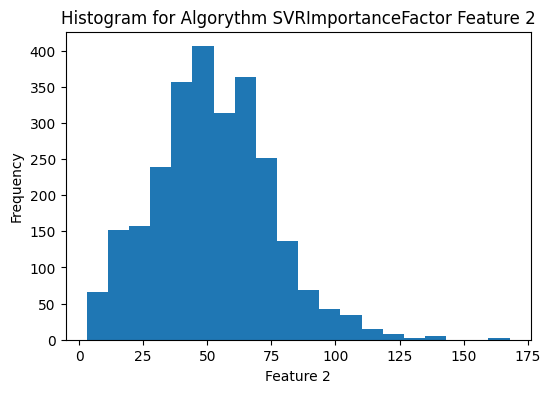

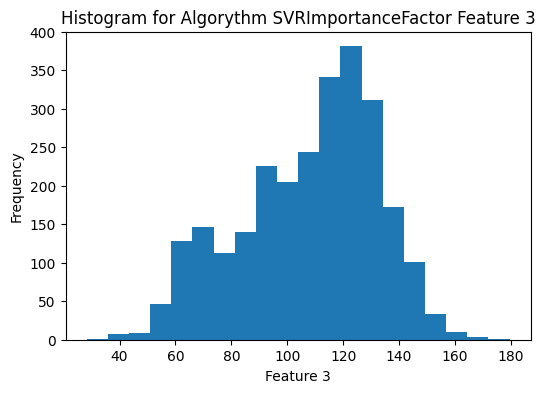

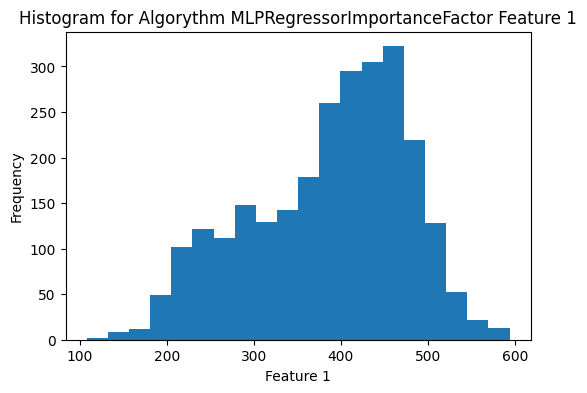

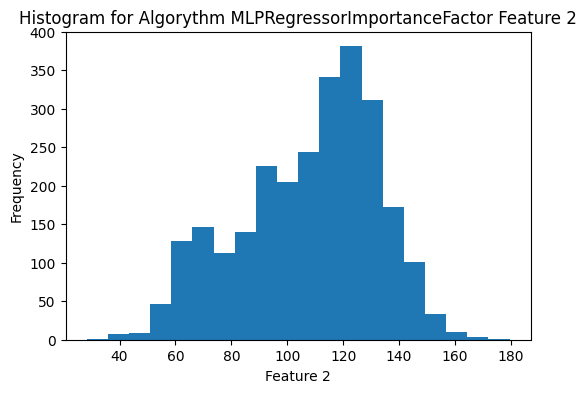

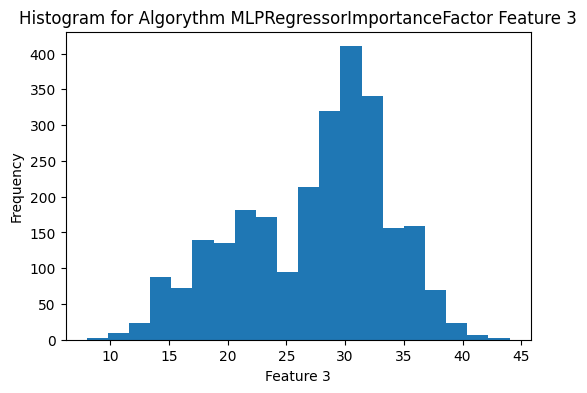

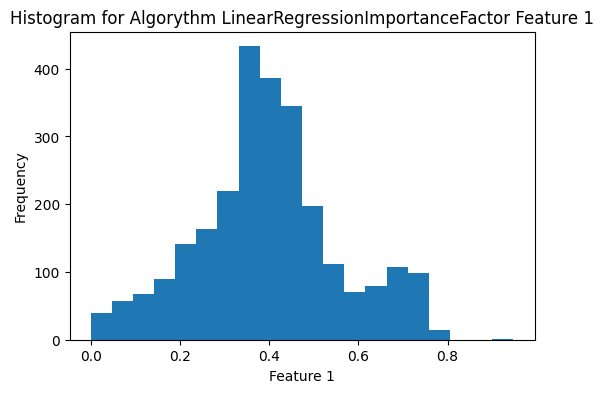

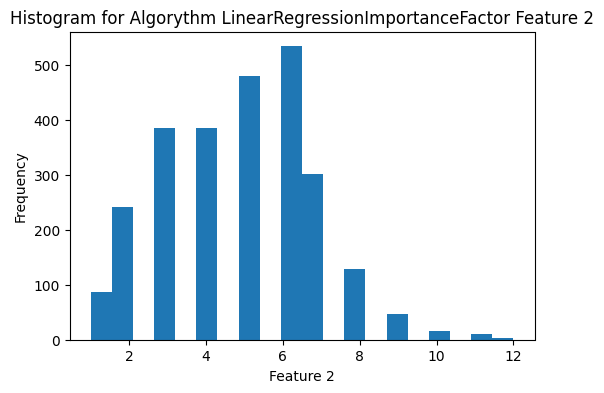

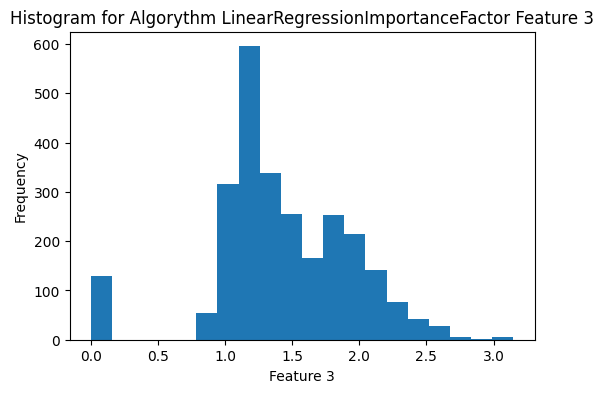

[array([[89.067     ,  1.66207119,  3.24      ],
       [72.904     ,  2.29200547, 12.47      ],
       [81.137     ,  1.62838003,  3.24      ],
       ...,
       [48.6677    ,  2.50812008, 12.03      ],
       [43.3327    ,  2.31881307, 47.29      ],
       [90.7308    ,  2.44971076, 96.28      ]]), array([[275.395 ,   3.24  ,  89.067 ],
       [272.175 ,  12.47  ,  72.904 ],
       [249.357 ,   3.24  ,  81.137 ],
       ...,
       [149.237 ,  12.03  ,  48.6677],
       [168.196 ,  47.29  ,  43.3327],
       [400.22  ,  96.28  ,  90.7308]]), array([[275.395 ,  89.067 ,  21.    ],
       [272.175 ,  72.904 ,  17.    ],
       [249.357 ,  81.137 ,  19.    ],
       ...,
       [149.237 ,  48.6677,  11.    ],
       [168.196 ,  43.3327,  12.    ],
       [400.22  ,  90.7308,  21.    ]]), array([[0.3       , 1.        , 1.66207119],
       [0.38461538, 2.        , 2.29200547],
       [0.33333333, 1.        , 1.62838003],
       ...,
       [0.4       , 1.        , 2.50812008],
       [0

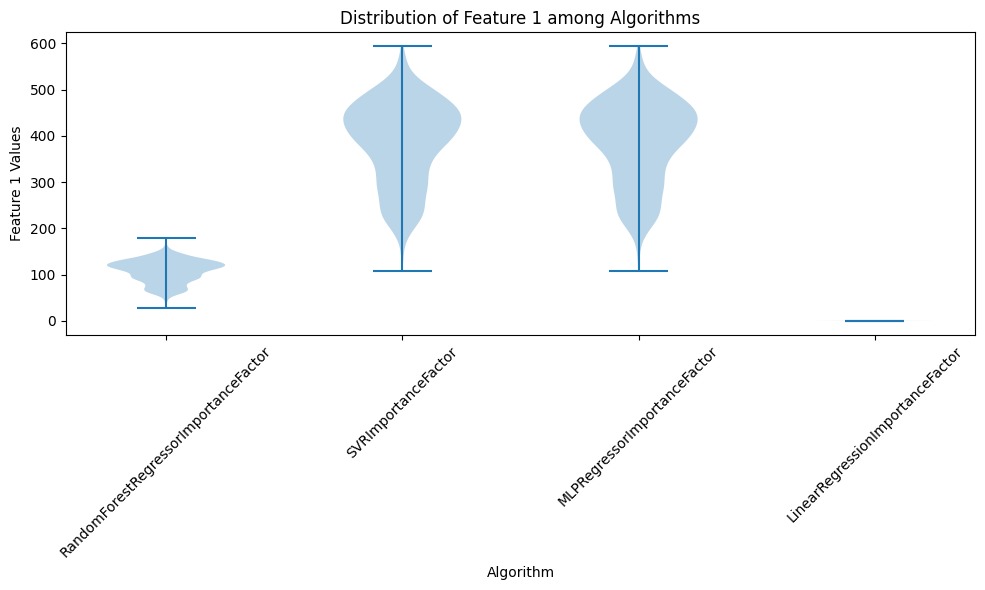

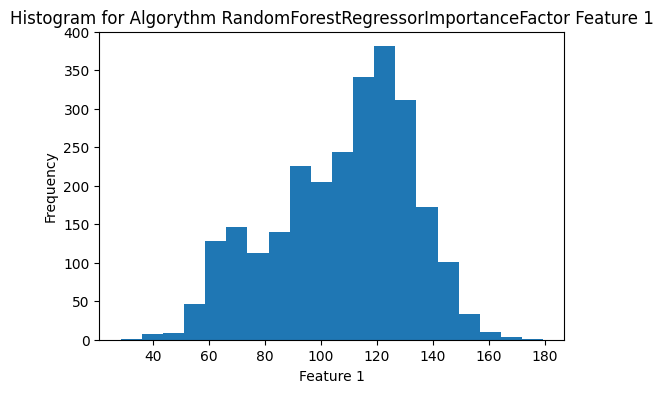

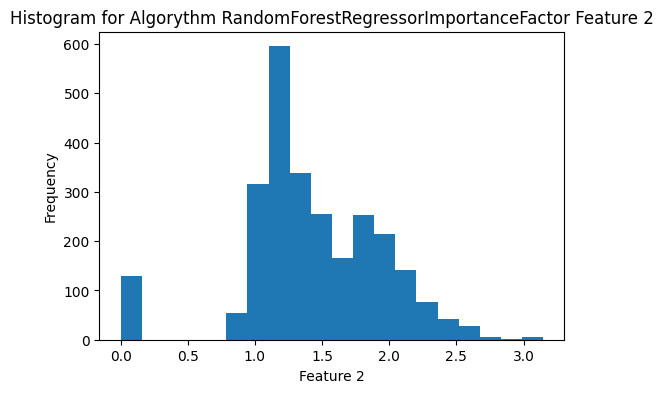

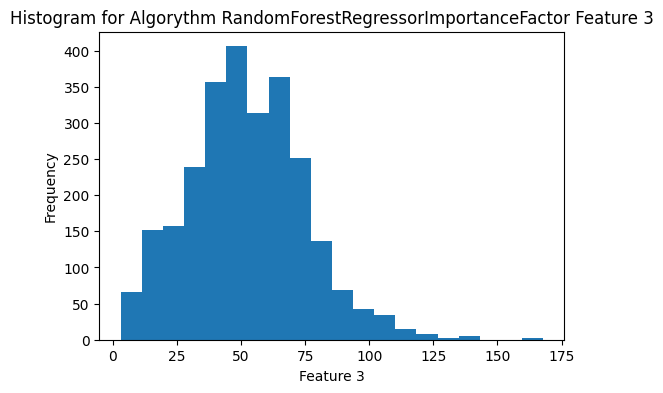

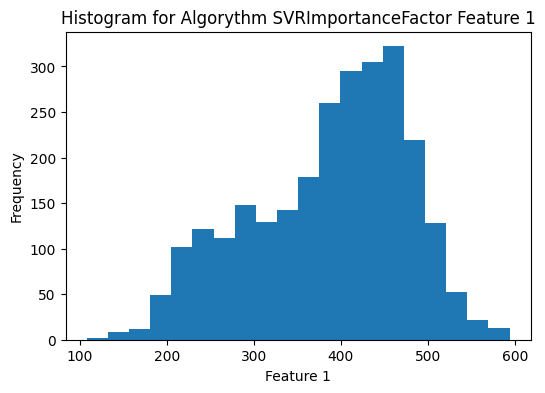

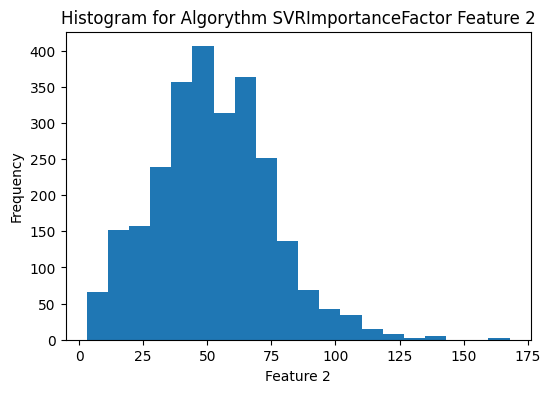

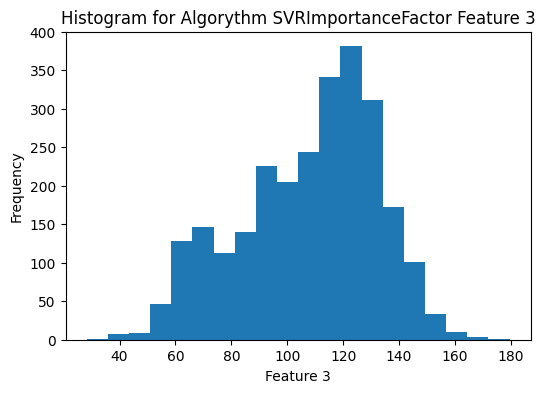

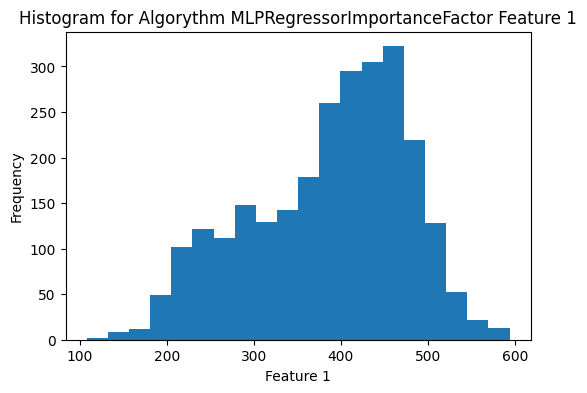

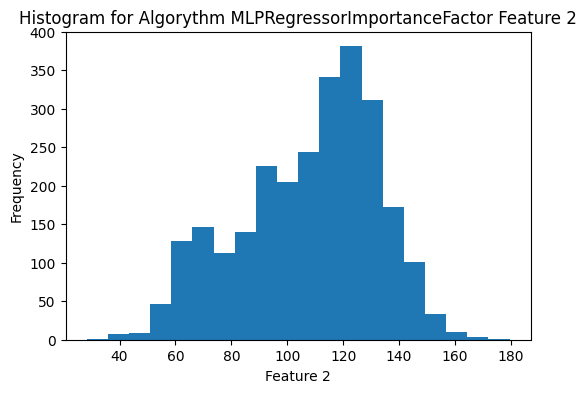

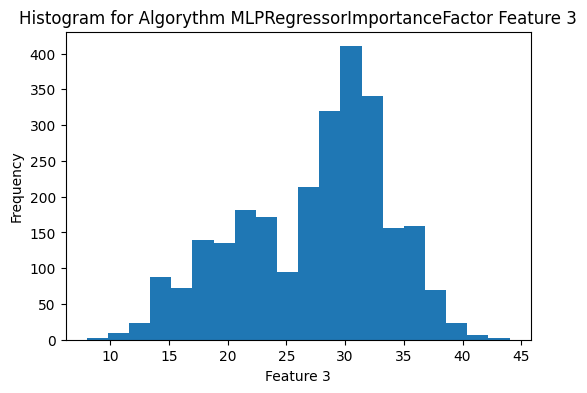

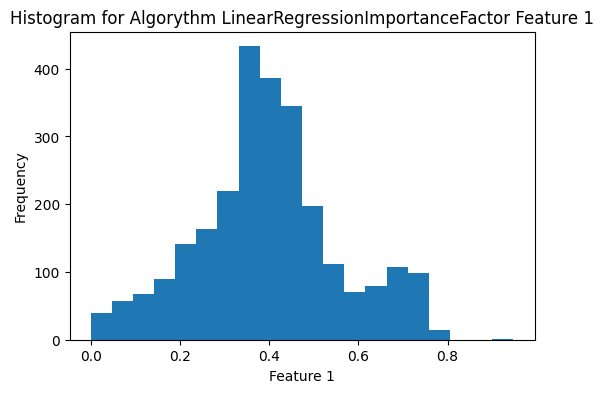

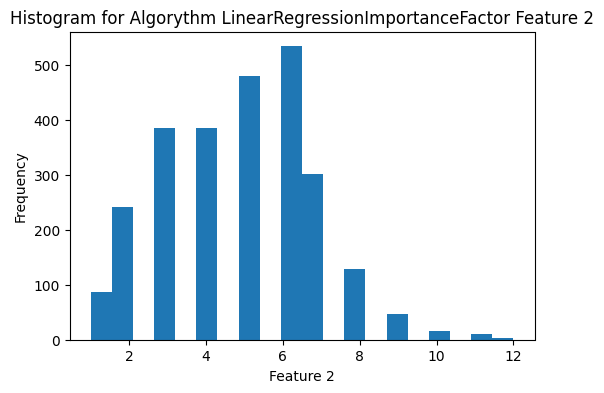

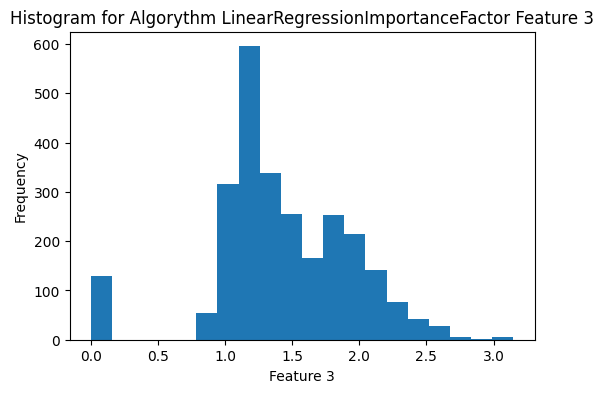

In [1]:
import matplotlib.pyplot as plt

from scripts.features.feature_engineering import FeatureExtractor
from scripts.processor.strategies import CustomFoldStrategy
from scripts.base_logger import VitroLogger
from scripts.features.model_analyzer import Analyzer
from scripts.processor.model_training import ModelContex

logger = VitroLogger()
if __name__ == "__main__":
    fe = FeatureExtractor()
    fn = fe.get_feature_descr_list_10_lambda()
    data = {}
    context = ModelContex()
    custom_analyzer = Analyzer()
    for model in context.models:
        strategy = CustomFoldStrategy(model, feature_extractor=fn)
        train_model = strategy.train_model()
        custom_analyzer.append_features(strategy.top_features_exp)
        data[str(type(model).__name__)] = {'test_exp': train_model.rmse_test_exp,
                                           'test_sim': train_model.rmse_test_sim,
                                           'val_exp': train_model.rmse_val_exp,
                                           'val_sim': train_model.rmse_val_sim}
    custom_significant_differences = custom_analyzer.analyze_feature_sets()
    models = list(data.keys())
    test_exp_values = [data[model]['test_exp'] for model in models]
    val_exp_values = [data[model]['val_exp'] for model in models]
    test_sim_values = [data[model]['test_sim'] for model in models]
    val_sim_values = [data[model]['val_sim'] for model in models]


    def add_labels(ax, values):
        for i, value in enumerate(values):
            ax.text(i, value + 0.05 * max(values), f"{value:.2f}", ha='center')


    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    bars = plt.bar(models, test_exp_values, color='skyblue')
    plt.title('Test Expected Values')
    plt.xlabel('Models')
    plt.ylabel('Values')
    add_labels(plt.gca(), test_exp_values)

    plt.subplot(2, 1, 2)
    bars = plt.bar(models, val_exp_values, color='lightgreen')
    plt.title('Validation Expected Values')
    plt.xlabel('Models')
    plt.ylabel('Values')
    add_labels(plt.gca(), val_exp_values)

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    bars = plt.bar(models, test_sim_values, color='salmon')
    plt.title('Test Simulation Values')
    plt.xlabel('Models')
    plt.ylabel('Values')
    add_labels(plt.gca(), test_sim_values)

    plt.subplot(2, 1, 2)
    bars = plt.bar(models, val_sim_values, color='gold')
    plt.title('Validation Simulation Values')
    plt.xlabel('Models')
    plt.ylabel('Values')
    add_labels(plt.gca(), val_sim_values)

    plt.tight_layout()
    plt.show()
    
    
    data_task_1 = []
    algorithm_names = []
    
    for subarray in custom_analyzer.top_features:
        for features in subarray:
            for i in range(3):
                plt.figure(figsize=(6, 4))
                plt.hist(list(features.values())[0][:, i], bins=20)
                plt.xlabel(f"Feature {i + 1}")
                plt.ylabel("Frequency")
                plt.title(f"Histogram for Algorythm {list(features.keys())[0]} Feature {i + 1}")
                plt.show()    
    
    for features_dict in custom_analyzer.top_features:
        for algo_name, features_array in features_dict[0].items():
            algorithm_names.append(algo_name)
            data_task_1.append(features_array)
    
    print(data_task_1)
    feature_to_compare = 0
    
    data_task_2 = []
    
    for features_dict in custom_analyzer.top_features:
        for algo_name, features_array in features_dict[0].items():
            data_task_2.append(features_array[:, feature_to_compare])
    plt.figure(figsize=(10, 6))
    plt.violinplot(data_task_2)
    plt.xlabel('Algorithm')
    plt.ylabel(f'Feature {feature_to_compare + 1} Values')
    plt.title(f'Distribution of Feature {feature_to_compare + 1} among Algorithms')
    plt.xticks(range(1, len(algorithm_names) + 1), algorithm_names, rotation=45)
    plt.tight_layout()
    plt.show()
    


    for subarray in custom_analyzer.top_features:
        for features in subarray:
            for i in range(3):
                plt.figure(figsize=(6, 4))
                plt.hist(list(features.values())[0][:, i], bins=20)
                plt.xlabel(f"Feature {i + 1}")
                plt.ylabel("Frequency")
                plt.title(f"Histogram for Algorythm {list(features.keys())[0]} Feature {i + 1}")
                plt.show()